# K-Means Lab

# # Init K-Means Environment

In [21]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import utils

### Define the k-Means algorithm

In [22]:
# Returns (C, gencentroids)
# C = array[points.shape[0]] wiht cluster assignments for each point in points
# genCentroids = array[numCentroids, points.shape[1]] with the generated centroids
def runKMeans(points, numCentroids, maxEpochs):
    
    # Initialize calculated cluster labels
    C = np.zeros(points.shape[0], int)
    
    # Select initial centroids from points
    rcentroids = np.empty([numCentroids, points.shape[1]])
    for i in range(0, numCentroids):
        cndx = np.trunc(np.random.rand()*C.size).astype(int)
        rcentroids[i] = points[cndx]
            
    for epoch in range(0,maxEpochs):
        # Find closest centroid for each point and store label in C
        for i in range(0, points.shape[0]):
            minDist=99999
            minCent=0
            for c in range(0, numCentroids):
                dist = utils.euclideanDist(points[i,0], points[i,1], rcentroids[c, 0], rcentroids[c,1])

                if (dist < minDist):
                    minDist=dist
                    minCent=c

            C[i] = minCent

        # Preserve the old centroids for convergence detection
        oldrcentroids = np.copy(rcentroids)

        # Recalculate centroids
        for i in range(0, C.size):
            cent = C[i]

            # Acculmulate average for every point in a given cluster into a new centroid.
            oldVal = rcentroids[cent]
            rcentroids[cent] = (oldVal + points[i])/2
            
        # have we converged to within 0.0000001?
        converged=1
        for i in range(0, numCentroids):
            dist = utils.euclideaanDist2(oldrcentroids[i], rcentroids[i])
            if (dist > 0.0000001):
                converged=0
                break

        if (converged==1):
            print("Converged after ", epoch, " epochs")
            break;
            
    return (C, rcentroids)

## Generate test data.
Generate artificial centroids randomly and then generate points centred around them.
These points should then be clustered by the k-Means algorithm.

In [23]:
numCentroids=5
dimensions=2
sigma=0.1
numPoints=30

centroids=np.empty([numCentroids, dimensions])

# Try to keep centroids around the central area of our graph
centroids[:,0] = np.random.normal(0.5, 0.3, numCentroids)
centroids[:,1] = np.random.normal(0.5, 0.3, numCentroids)

#for nc in range(0, numCentroids):
#        centroids[nc] = np.random.rand(dimensions)
        
#centroid=np.array([[0.3,0.5], [0.7, 0.3]])
print(centroids)
points = utils.generateTestPoints(centroids, numPoints, sigma)

[[ 0.51768477 -0.26452187]
 [ 0.49184446  0.737544  ]
 [ 0.36959449  0.63758491]
 [ 0.26632508  0.36947822]
 [ 0.92853543  0.38244882]]


## Call the k-Means algorithm to cluster the test points

In [24]:
(C, genCentroids) = runKMeans(points, numCentroids, 1000)
print("C=", C)
print("Generated Centroids=", genCentroids)

Converged after  4  epochs
C= [3 4 4 4 4 0 2 0 0 0 3 1 1 1 0 2 2 3 1 3 4 4 4 0 3 3 4 2 1 4 2 1 2 4 1 4 1
 4 2 2 0 1 0 1 1 3 1 4 4 2 1 0 0 2 2 2 0 3 1 1 2 2 3 3 2 1 4 4 0 0 2 0 2 3
 3 4 3 3 3 0 3 4 3 1 2 3 0 2 0 3 3 3 3 0 1 2 4 1 0 3 1 2 3 1 1 2 4 4 1 4 2
 3 0 3 3 3 0 2 1 4 1 1 0 2 0 4 2 0 2 2 1 4 1 0 1 3 4 0 4 1 0 2 2 4 0 3 4 0
 4 0]
Generated Centroids= [[ 0.90762586  0.38289971]
 [ 0.50561657 -0.29093781]
 [ 0.35665631  0.63778225]
 [ 0.49044198  0.74700433]
 [ 0.28188019  0.35648871]]


## Plot the results visully

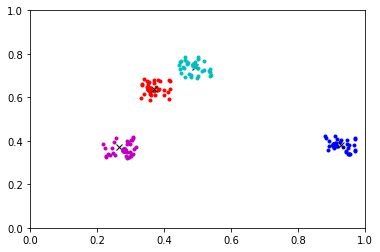

In [25]:
# ASSUMPTION: dimensions==2.

plt.figure()

colors=('b', 'g', 'r', 'c', 'm', 'y')

for i in range(0,numCentroids):
    X_i = points[C==i, 0]
    Y_i = points[C==i, 1]

    plt.plot(X_i, Y_i, colors[i]+".")
    plt.plot(centroids[i, 0], centroids[i, 1], "kx")
    plt.plot(genCentroids[i, 0], genCentroids[i,1], colors[i]+"o")
    
plt.axis([0, 1, 0,  1])
plt.show()